# Statistical Analysis

## Data Properties

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

df = pd.read_csv('quantitative_data.csv',
                 true_values=['WAHR'],
                 false_values=['FALSCH'],
                )

interface_A = df[df['Interface'] == 'A']
interface_B = df[df['Interface'] == 'B']

### Measurement 1: Time Needed to See Which of My Tasks Are Due in the Next Days

In [2]:
task_1_time_A = interface_A['Task 1 Time [s]']
task_1_time_B = interface_B['Task 1 Time [s]']

In [3]:
display(task_1_time_A.describe(), task_1_time_B.describe())

count    12.000000
mean     14.750000
std       7.350015
min       4.000000
25%      10.750000
50%      13.000000
75%      17.000000
max      31.000000
Name: Task 1 Time [s], dtype: float64

count    12.000000
mean     13.583333
std       4.122187
min       7.000000
25%      11.000000
50%      13.000000
75%      15.750000
max      21.000000
Name: Task 1 Time [s], dtype: float64

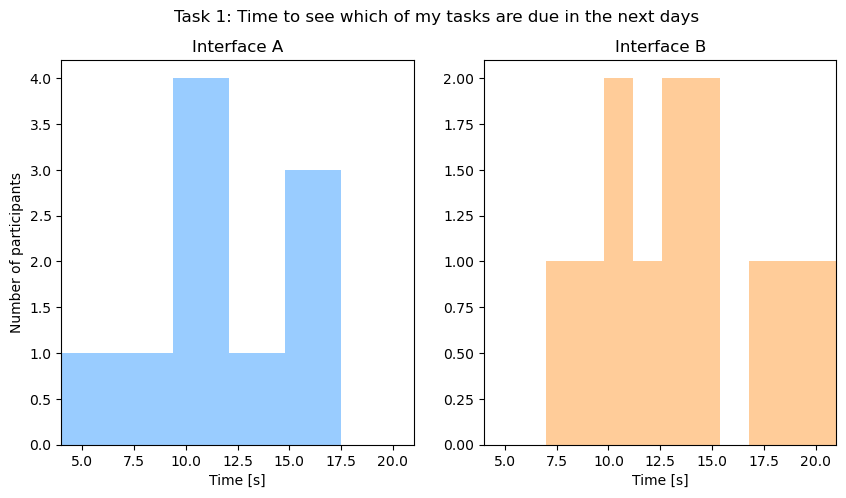

In [4]:
fig, axs = plt.subplots(1, 2,figsize=(10, 5))
fig.suptitle('Task 1: Time to see which of my tasks are due in the next days')
# change color of the bars to light blue
axs[0].hist(task_1_time_A, color='#99CCFF')
axs[0].set_xlabel('Time [s]')
axs[0].set_title('Interface A')
axs[0].set_ylabel('Number of participants')
axs[0].set_xlim([min(task_1_time_A), max(task_1_time_B)])  # Set the same x-axis limits for both plots

# change color of the bars to light orange
axs[1].hist(task_1_time_B, color='#FFCC99')
axs[1].set_xlabel('Time [s]')
axs[1].set_title('Interface B')
axs[1].set_xlim([min(task_1_time_A), max(task_1_time_B)])  # Set the same x-axis limits for both plots

plt.show()

In [5]:
display(stats.shapiro(task_1_time_A), stats.shapiro(task_1_time_B))

ShapiroResult(statistic=0.9261507987976074, pvalue=0.3410913348197937)

ShapiroResult(statistic=0.9680989384651184, pvalue=0.8899027109146118)

Even though the histograms don't look like typical normally distributed data, the Shapiro-Wilk test clearly shows that the data is normally distributed. $p \geq 0.05$ for both interfacesZ, so our null hypothesis (the data is normally distributed) cannot be rejected.

In [6]:
stats.levene(task_1_time_A, task_1_time_B)

LeveneResult(statistic=1.642951833848873, pvalue=0.21326540639550026)

The Levene test shows that the variances of the two interfaces are equal. $p \geq 0.05$, so our null hypothesis (homoscedasticity of the data) cannot be rejected.

# Measurement 1: Mean and Std plot

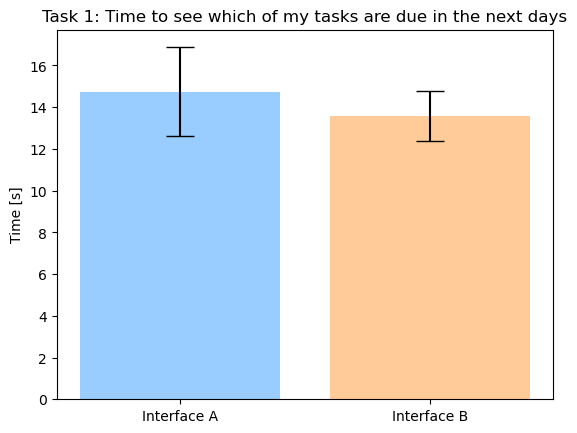

In [7]:
fig, ax = plt.subplots()
ax.bar(['Interface A', 'Interface B'], [task_1_time_A.mean(), task_1_time_B.mean()], yerr=[task_1_time_A.sem(), task_1_time_B.sem()], capsize=10, color=['#99CCFF', '#FFCC99'])
ax.set_ylabel('Time [s]')
ax.set_title('Task 1: Time to see which of my tasks are due in the next days')
plt.show()


### Measurement 2: Time Needed to Read the Information of any Task

In [8]:
task_2_time_A = interface_A['Task 2 Time [s]']
task_2_time_B = interface_B['Task 2 Time [s]']

In [9]:
display(task_2_time_A.describe(), task_2_time_B.describe())

count    12.000000
mean     12.666667
std       6.919450
min       4.000000
25%       7.750000
50%      10.000000
75%      19.250000
max      25.000000
Name: Task 2 Time [s], dtype: float64

count    12.000000
mean     20.000000
std      11.045361
min       8.000000
25%      11.750000
50%      15.500000
75%      29.000000
max      36.000000
Name: Task 2 Time [s], dtype: float64

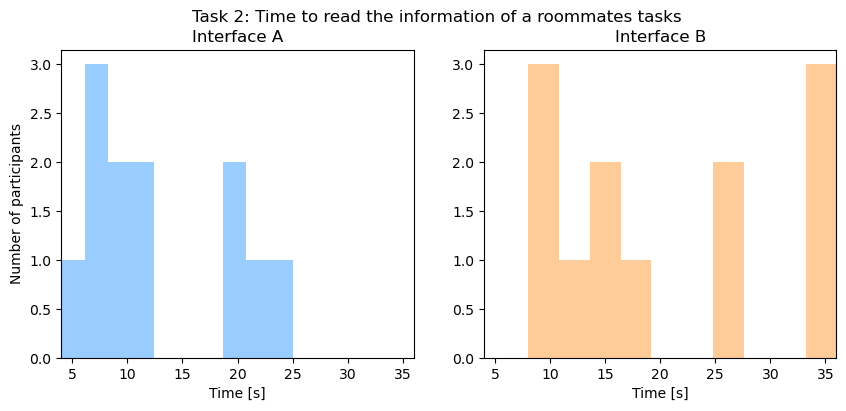

In [10]:
fig, axs = plt.subplots(1, 2,figsize=(10, 4))
fig.suptitle('Task 2: Time to read the information of a roommates tasks')
# change color of the bars to light blue
axs[0].hist(task_2_time_A, color='#99CCFF')
axs[0].set_xlabel('Time [s]')
axs[0].set_title('Interface A')

# change color of the bars to light orange
axs[1].hist(task_2_time_B, color='#FFCC99')
axs[1].set_xlabel('Time [s]')
axs[1].set_title('Interface B')

# add y label to the left plot
axs[0].set_ylabel('Number of participants')

# Set the same x-axis limits for both plots
axs[0].set_xlim([min(task_2_time_A), max(task_2_time_B)])
axs[1].set_xlim([min(task_2_time_A), max(task_2_time_B)])

plt.show()

In [11]:
display(stats.shapiro(task_2_time_A), stats.shapiro(task_2_time_B))

ShapiroResult(statistic=0.8798807859420776, pvalue=0.08733878284692764)

ShapiroResult(statistic=0.8599857091903687, pvalue=0.04886648431420326)

While the data for interface A is normally distributed, the data for interface B is not. The Shapiro-Wilk test shows that the p-value for interface B is below $0.05$, so our null hypothesis (the data is normally distributed) can be rejected for interface B.

In [12]:
stats.levene(task_2_time_A, task_2_time_B)

LeveneResult(statistic=2.2891424075531073, pvalue=0.14451591105326236)

The Levene test shows that the variances of the two interfaces are equal. $p \geq 0.05$, so our null hypothesis (homoscedasticity of the data) cannot be rejected.

# Measurement 2: Mean and Std plot

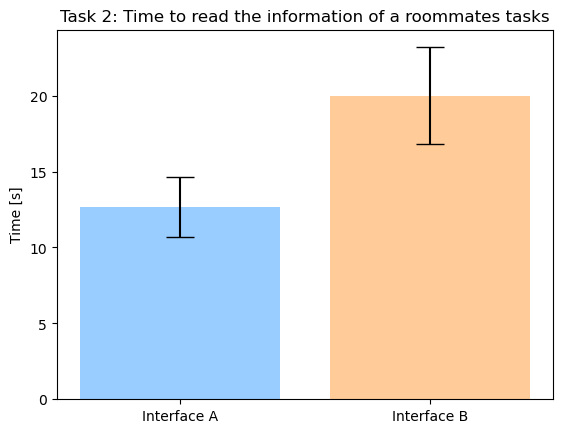

In [13]:
# mean and std deviation of measurements 2

fig, ax = plt.subplots()
ax.bar(['Interface A', 'Interface B'], [task_2_time_A.mean(), task_2_time_B.mean()], yerr=[task_2_time_A.sem(), task_2_time_B.sem()], capsize=10, color=['#99CCFF', '#FFCC99'])
ax.set_ylabel('Time [s]')
ax.set_title('Task 2: Time to read the information of a roommates tasks')
plt.show()


### Measurement 3: Reading the full and correct information of a task
This task was interwoven with tasks 1 and 2, because the participants had to find a hidden message by themselves. The message prompted the participant to announce to the experimenter that they had found it.

In [14]:
task_3_found_message_A = interface_A['Hidden message noticed']
task_3_found_message_B = interface_B['Hidden message noticed']

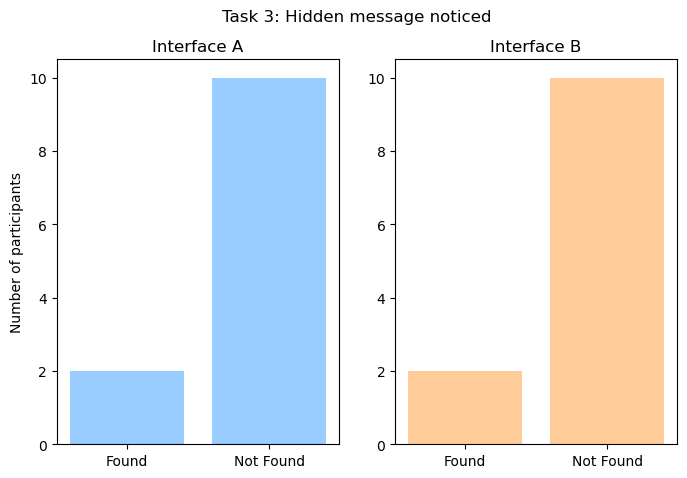

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5))  # Increase the width of the figure

fig.suptitle('Task 3: Hidden message noticed')
# change color of the bars to light blue
axs[0].bar(['Found', 'Not Found'], [task_3_found_message_A.sum(), task_3_found_message_A.count() - task_3_found_message_A.sum()], color='#99CCFF')
axs[0].set_title('Interface A')
# continue with the second plot
axs[1].bar(['Found', 'Not Found'], [task_3_found_message_B.sum(), task_3_found_message_B.count() - task_3_found_message_B.sum()], color='#FFCC99')
axs[1].set_title('Interface B')

# add y axis label
axs[0].set_ylabel('Number of participants')

plt.show()


If this binary measure is interpreted as the numbers $0$ and $1$ we can derive further statistical insights.

In [16]:
task_3_found_message_A = task_3_found_message_A.astype(float)
task_3_found_message_B = task_3_found_message_B.astype(float)

In [17]:
display(task_3_found_message_A.describe(), task_3_found_message_B.describe())

count    12.000000
mean      0.166667
std       0.389249
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Hidden message noticed, dtype: float64

count    12.000000
mean      0.166667
std       0.389249
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Hidden message noticed, dtype: float64

In [18]:
display(stats.shapiro(task_3_found_message_A), stats.shapiro(task_3_found_message_B))

ShapiroResult(statistic=0.46465229988098145, pvalue=9.811246854951605e-06)

ShapiroResult(statistic=0.46465229988098145, pvalue=9.811246854951605e-06)

The Shapiro-Wilk test yields a very low p-value. This makes sense since the entries are either $0$ or $1$, which is far from a normal distribution.

In [19]:
stats.levene(task_3_found_message_A, task_3_found_message_B)

LeveneResult(statistic=0.0, pvalue=1.0)

This very clear result of the Levene test comes from the fact that the measurements are exactly the same for both interfaces. Therefore, both variances are also equal.

### Measurement 4: NASA TLX
While the effects on the NASA TLX scores were not originally accounted for when stating our null hypotheses, we will still include them now. We will analyze this metric in two different ways; every dimension on its own, and then the unweighted sum of all dimensions.

In [20]:
nasa_tlx_A = interface_A.filter(like="TLX")
nasa_tlx_B = interface_B.filter(like="TLX")

In [21]:
display(nasa_tlx_A.describe(), nasa_tlx_B.describe())

,TLX: Mental Demand,TLX: Physical Demand,TLX: Temporal Demand,TLX: Performance,TLX: Effort,TLX: Frustration
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,5.916667,3.833333,7.916667,6.750000,7.250000,5.416667
std,2.314316,3.325749,3.776924,5.462683,3.671141,3.369875
min,1.000000,0.000000,4.000000,0.000000,2.000000,1.000000
25%,4.750000,0.750000,5.000000,2.000000,4.000000,3.750000
50%,6.500000,5.000000,6.500000,6.000000,7.500000,5.000000
75%,7.250000,6.000000,10.250000,9.750000,10.000000,6.250000
max,9.000000,10.000000,15.000000,16.000000,14.000000,14.000000


,TLX: Mental Demand,TLX: Physical Demand,TLX: Temporal Demand,TLX: Performance,TLX: Effort,TLX: Frustration
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,4.166667,2.666667,9.083333,5.500000,5.416667,3.666667
std,1.898963,2.498484,5.418123,5.823151,3.704011,2.534609
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.750000,0.000000,6.250000,0.750000,2.750000,2.000000
50%,5.000000,3.500000,9.500000,3.500000,4.000000,3.000000
75%,5.250000,4.000000,12.250000,9.000000,7.250000,5.000000
max,7.000000,8.000000,20.000000,16.000000,12.000000,9.000000


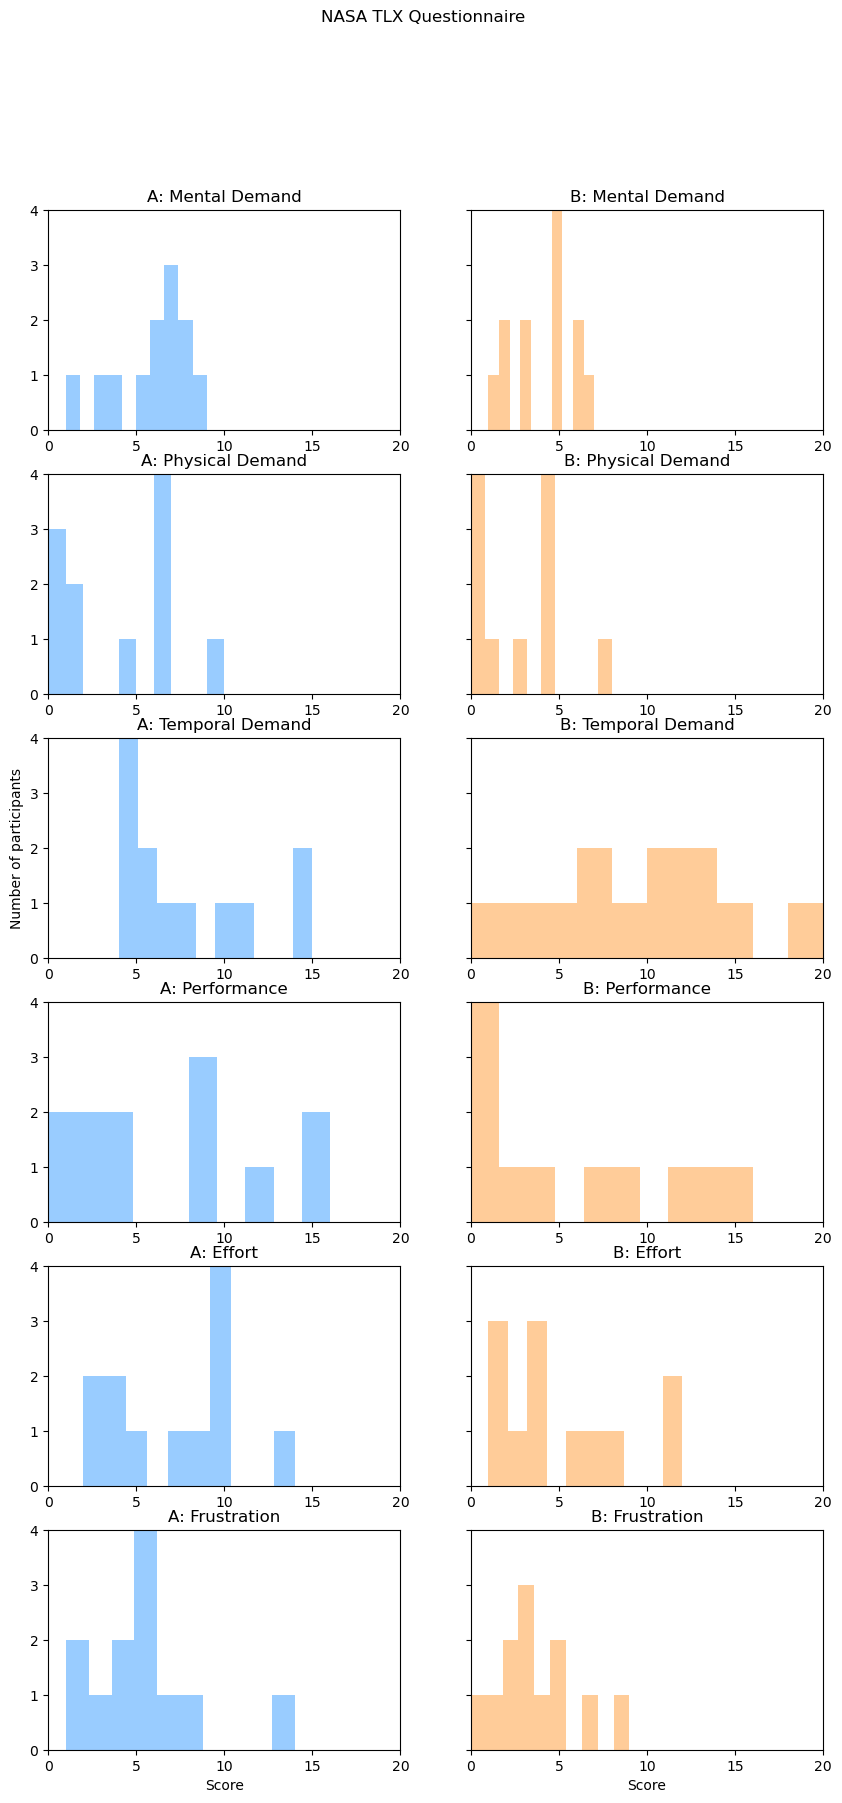

In [22]:
fig, axs = plt.subplots(6, 2, figsize=(10, 20), sharey=True)
fig.suptitle('NASA TLX Questionnaire')

# add x axis label
axs[5, 0].set_xlabel('Score')
axs[5, 1].set_xlabel('Score')

# add descriptive text for y axis on the left
axs[0, 0].set_title("A: Mental Demand")
axs[1, 0].set_title('A: Physical Demand')
axs[2, 0].set_title('A: Temporal Demand')
axs[3, 0].set_title('A: Performance')
axs[4, 0].set_title('A: Effort')
axs[5, 0].set_title('A: Frustration')

# add descriptive text for y axis on the right
axs[0, 1].set_title("B: Mental Demand")
axs[1, 1].set_title('B: Physical Demand')
axs[2, 1].set_title('B: Temporal Demand')
axs[3, 1].set_title('B: Performance')
axs[4, 1].set_title('B: Effort')
axs[5, 1].set_title('B: Frustration')

axs[2, 0].set_ylabel('Number of participants')

for i, tlx_dimension in enumerate(nasa_tlx_A):
    axs[i, 0].hist(nasa_tlx_A[tlx_dimension], color='#99CCFF' )
    axs[i, 0].set_xlim([0, 20])  # Set x-axis limits from 0 to 20
    axs[i, 0].set_ylim([0, 4])  # Set y-axis limits from 0 to 4
    axs[i, 0].set_xticks([0, 5, 10, 15, 20])  # Set x-ticks
    axs[i, 0].set_yticks([0, 1, 2, 3, 4])  # Set y-ticks

    axs[i, 1].hist(nasa_tlx_B[tlx_dimension], color='#FFCC99')
    axs[i, 1].set_xlim([0, 20])  # Set x-axis limits from 0 to 20
    axs[i, 1].set_ylim([0, 4])  # Set y-axis limits from 0 to 4
    axs[i, 1].set_xticks([0, 5, 10, 15, 20])  # Set x-ticks
    axs[i, 1].set_yticks([0, 1, 2, 3, 4])  # Set y-ticks

plt.show()


In [32]:
#print all keys to see which ones are available
print(nasa_tlx_A.keys())

Index(['TLX: Mental Demand', 'TLX: Physical Demand', 'TLX: Temporal Demand',
       'TLX: Performance', 'TLX: Effort', 'TLX: Frustration'],
      dtype='object')


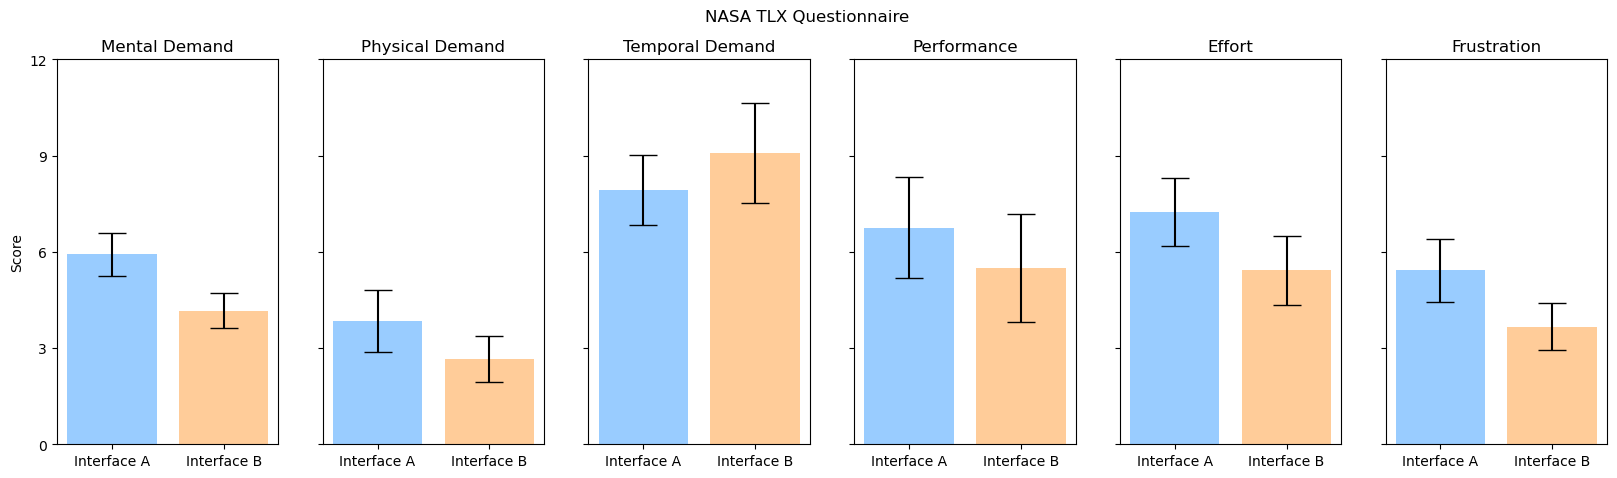

In [38]:
# add a mean and std devition bar plot for each questionnaire dimension
fig, axs = plt.subplots(1, 6, figsize=(20, 5), sharey=True)
fig.suptitle('NASA TLX Questionnaire')
# add bar plots
axs[0].bar(['Interface A', 'Interface B'], [nasa_tlx_A['TLX: Mental Demand'].mean(), nasa_tlx_B['TLX: Mental Demand'].mean()], yerr=[nasa_tlx_A['TLX: Mental Demand'].sem(), nasa_tlx_B['TLX: Mental Demand'].sem()], capsize=10, color=['#99CCFF', '#FFCC99'])
axs[1].bar(['Interface A', 'Interface B'], [nasa_tlx_A['TLX: Physical Demand'].mean(), nasa_tlx_B['TLX: Physical Demand'].mean()], yerr=[nasa_tlx_A['TLX: Physical Demand'].sem(), nasa_tlx_B['TLX: Physical Demand'].sem()], capsize=10, color=['#99CCFF', '#FFCC99'])
axs[2].bar(['Interface A', 'Interface B'], [nasa_tlx_A['TLX: Temporal Demand'].mean(), nasa_tlx_B['TLX: Temporal Demand'].mean()], yerr=[nasa_tlx_A['TLX: Temporal Demand'].sem(), nasa_tlx_B['TLX: Temporal Demand'].sem()], capsize=10, color=['#99CCFF', '#FFCC99'])
axs[3].bar(['Interface A', 'Interface B'], [nasa_tlx_A['TLX: Performance'].mean(), nasa_tlx_B['TLX: Performance'].mean()], yerr=[nasa_tlx_A['TLX: Performance'].sem(), nasa_tlx_B['TLX: Performance'].sem()], capsize=10, color=['#99CCFF', '#FFCC99'])
axs[4].bar(['Interface A', 'Interface B'], [nasa_tlx_A['TLX: Effort'].mean(), nasa_tlx_B['TLX: Effort'].mean()], yerr=[nasa_tlx_A['TLX: Effort'].sem(), nasa_tlx_B['TLX: Effort'].sem()], capsize=10, color=['#99CCFF', '#FFCC99'])
axs[5].bar(['Interface A', 'Interface B'], [nasa_tlx_A['TLX: Frustration'].mean(), nasa_tlx_B['TLX: Frustration'].mean()], yerr=[nasa_tlx_A['TLX: Frustration'].sem(), nasa_tlx_B['TLX: Frustration'].sem()], capsize=10, color=['#99CCFF', '#FFCC99'])

# add y axis label
axs[0].set_ylabel('Score')
axs[0].set_ylim([0, 10])  # Set y-axis limits from 0 to 20
axs[0].set_yticks([0, 3,6,9,12])  # Set y-ticks


# add descriptive text for x axis
axs[0].set_title("Mental Demand")
axs[1].set_title('Physical Demand')
axs[2].set_title('Temporal Demand')
axs[3].set_title('Performance')
axs[4].set_title('Effort')
axs[5].set_title('Frustration')

plt.show()


In [23]:
nasa_tlx_A_total = nasa_tlx_A.sum(axis=1)
nasa_tlx_B_total = nasa_tlx_B.sum(axis=1)

In [24]:
display(nasa_tlx_A_total.describe(), nasa_tlx_B_total.describe())

count    12.000000
mean     37.083333
std      10.697989
min      20.000000
25%      31.000000
50%      36.000000
75%      41.250000
max      59.000000
dtype: float64

count    12.000000
mean     30.500000
std      12.325141
min      12.000000
25%      22.250000
50%      30.500000
75%      39.500000
max      52.000000
dtype: float64

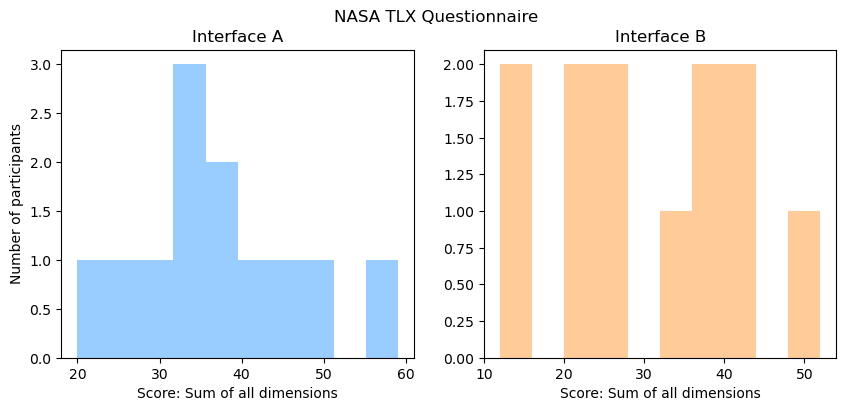

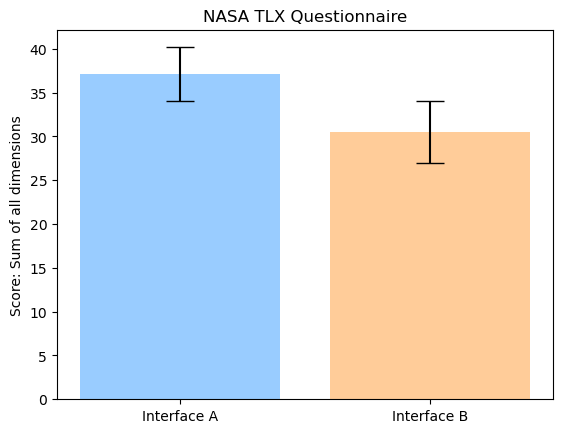

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('NASA TLX Questionnaire')

# change color of the bars to light blue
axs[0].hist(nasa_tlx_A_total, color='#99CCFF')
axs[0].set_xlabel('Score: Sum of all dimensions')
axs[0].set_title('Interface A')

# change color of the bars to light orange
axs[1].hist(nasa_tlx_B_total, color='#FFCC99')
axs[1].set_xlabel('Score: Sum of all dimensions')
axs[1].set_title('Interface B')

# add y axis label
axs[0].set_ylabel('Number of participants')

plt.show()


# add a plot for the total score containing mean and std deviation
fig, ax = plt.subplots()
ax.bar(['Interface A', 'Interface B'], [nasa_tlx_A_total.mean(), nasa_tlx_B_total.mean()], yerr=[nasa_tlx_A_total.sem(), nasa_tlx_B_total.sem()], capsize=10, color=['#99CCFF', '#FFCC99'])
ax.set_ylabel('Score: Sum of all dimensions')
ax.set_title('NASA TLX Questionnaire')
plt.show()


## Statistical Tests
The data from task 1 is normally distributed and homoscedastic, so a paired t-test is appropriate. The data from task 2 however is not normally distributed, so a Wilcoxon signed-rank test is more appropriate.

### Measurement 1: Time Needed to See Which of My Tasks Are Due in the Next Days
Task 1 data is normally distributed and homoscedastic, so a paired t-test is appropriate.

In [26]:
stats.ttest_rel(task_1_time_A, task_1_time_B)

TtestResult(statistic=0.8102570230252584, pvalue=0.4349715466165315, df=11)

The p-value from the paired t-test is above $0.05$, so our null hypothesis (there is no difference between interface A and B in terms of time needed to see which of the users tasks are due in the next days) cannot be rejected. There is no statistical evidence suggesting that one interface is better than the other in this regard.

### Measurement 2: Time Needed to Read the Information of any Task
Task 2 data is not normally distributed, so a Wilcoxon signed-rank test is appropriate.

In [27]:
stats.wilcoxon(task_2_time_A, task_2_time_B)

WilcoxonResult(statistic=4.0, pvalue=0.00341796875)

The p-value from the Wilcoxon signed-rank test is below $0.05$, so our null hypothesis (there is no difference between interface A and B in terms of time needed to read the information of any task) can be rejected. There is a statistically significant difference between the two interfaces concerning this metric.

### Measurement 3: Reading the full and correct information of a task
As noted in the previous chapter, this dataset is interpreted as real numbers $0$ or 1$. Since the dataset is not normally distributed we apply the Wilcoson signed-rank test.

**TODO**: This does not work.

In [28]:
# add tiny deviation to avoid division by zero
task_3_found_message_A = task_3_found_message_A + 1e-6

stats.wilcoxon(task_3_found_message_A, task_3_found_message_B)

WilcoxonResult(statistic=0.0, pvalue=0.00048828125)

### Measurement 4: NASA TLX
This metric consists of ordinal data, so a Wilcoxon signed-rank test is appropriate.

In [29]:
{tlx_dimension: stats.wilcoxon(nasa_tlx_A[tlx_dimension], nasa_tlx_B[tlx_dimension]) for tlx_dimension in nasa_tlx_A}

/Users/janulm/miniconda3/envs/iml/lib/python3.9/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/janulm/miniconda3/envs/iml/lib/python3.9/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


{'TLX: Mental Demand': WilcoxonResult(statistic=0.0, pvalue=0.010909498364269283),
 'TLX: Physical Demand': WilcoxonResult(statistic=6.0, pvalue=0.15972433841626588),
 'TLX: Temporal Demand': WilcoxonResult(statistic=17.5, pvalue=0.3052197540535445),
 'TLX: Performance': WilcoxonResult(statistic=13.0, pvalue=0.2519014608706708),
 'TLX: Effort': WilcoxonResult(statistic=15.0, pvalue=0.06396484375),
 'TLX: Frustration': WilcoxonResult(statistic=13.0, pvalue=0.13658000393688932)}

According to the Wilcoxon signed-rank test, there is only a statistically siginificant difference between the two interfaces in a single dimension, namely "Mental Demand".

In [30]:
stats.wilcoxon(nasa_tlx_A_total, nasa_tlx_B_total)

WilcoxonResult(statistic=7.0, pvalue=0.020418612859613723)

We can set up a new null hypothesis: There is no difference between interface A and B in terms of the NASA TLX scores.

The p-value from the Wilcoxon signed-rank test is below $0.05$, so our null hypothesis from above can be rejected. There is a statistically significant difference between the two interfaces on the TLX score.